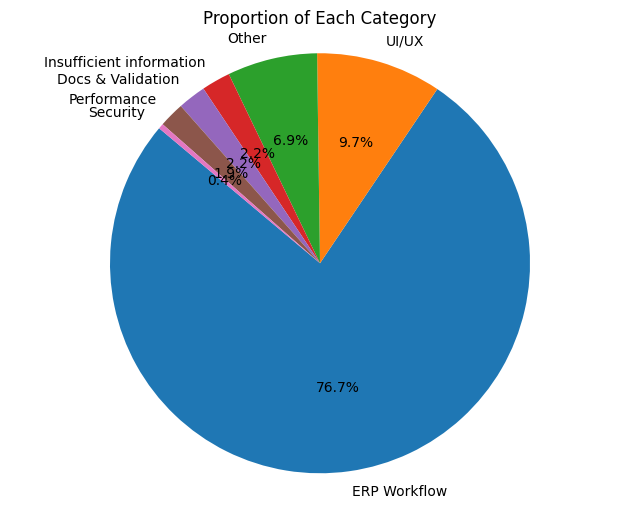

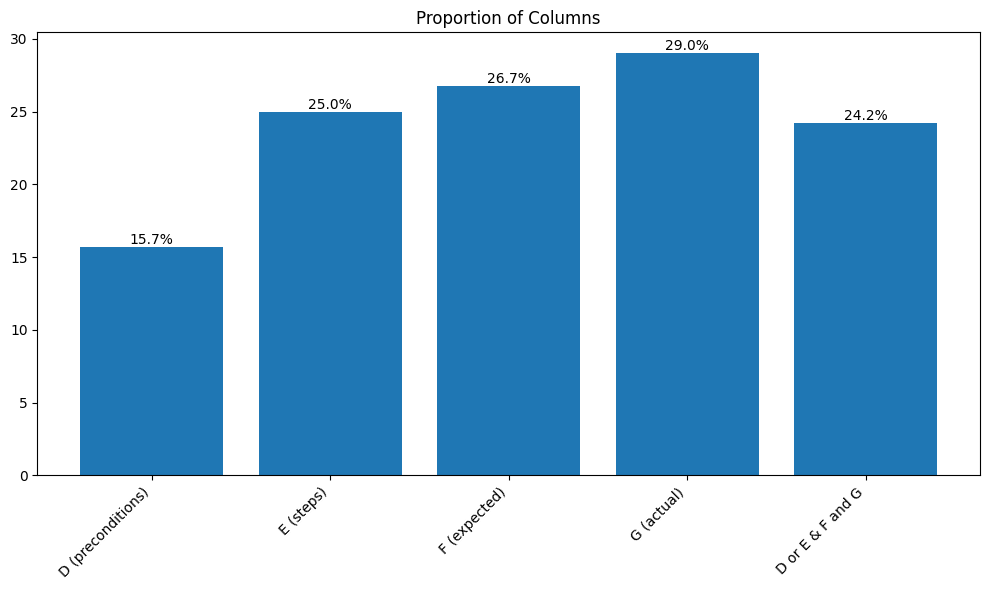

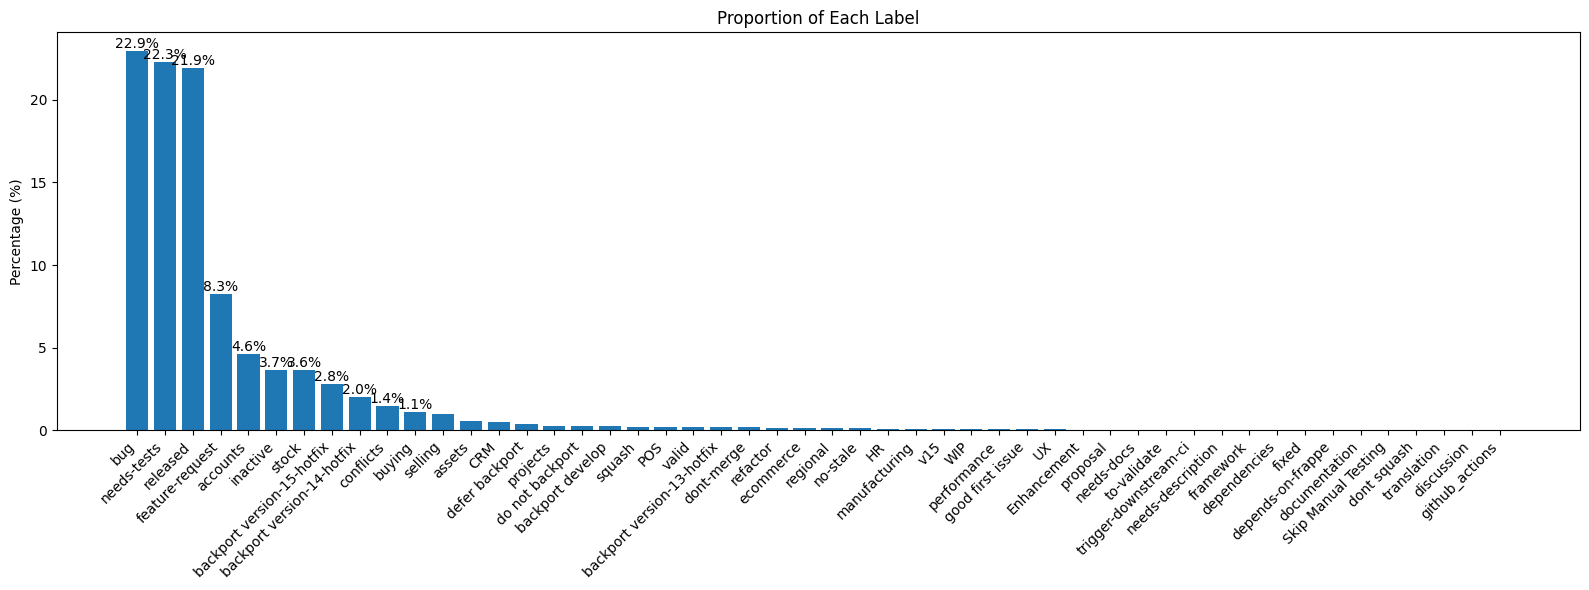

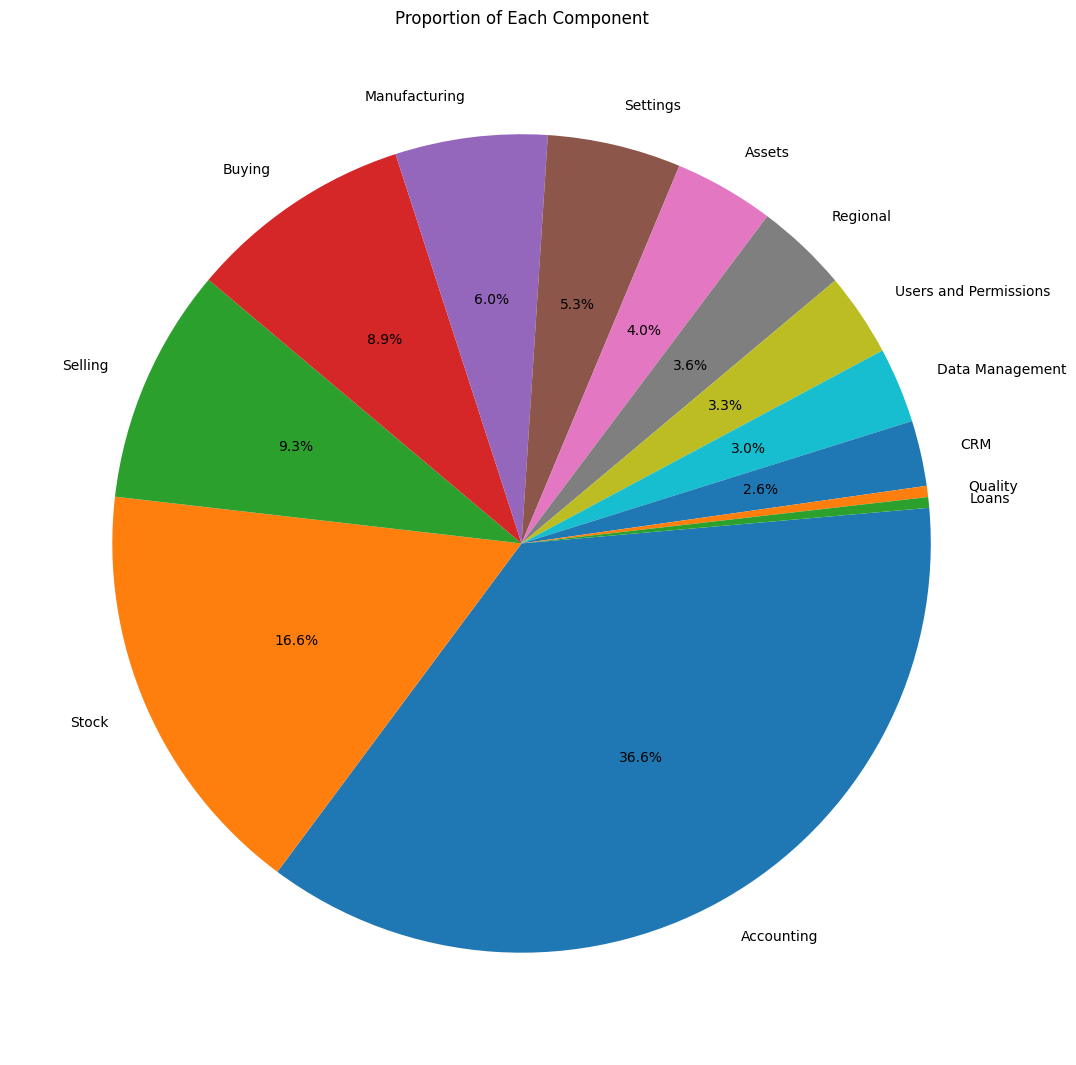

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import re

data = pd.read_csv('../data-analysis/filtered_issues.csv')

def clean_text(text):
    if pd.isna(text):
        return text
    text = re.sub(r'[^\x00-\x7F\u4e00-\u9fff\s,]', '', str(text))
    return text

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].apply(clean_text)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')

data['D_nonempty'] = data['preconditions'].notna()
data['E_nonempty'] = data['steps_to_reproduce'].notna()
data['F_nonempty'] = data['expected_results'].notna()
data['G_nonempty'] = data['actual_results'].notna()
data['D_or_E'] = data['D_nonempty'] | data['E_nonempty']
data['F_and_G'] = data['F_nonempty'] & data['G_nonempty']
data['D_or_E_and_F_and_G'] = data['D_or_E'] & data['F_and_G']

plt.figure(figsize=(8, 6))
category_counts = data['category'].value_counts(normalize=True) * 100
patches, texts, autotexts = plt.pie(category_counts, 
                                  labels=category_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=140)
plt.title('Proportion of Each Category')
plt.axis('equal')
# plt.savefig('../data-analysis/category_distribution.png', bbox_inches='tight', dpi=300)
# plt.close()
plt.show()


plt.figure(figsize=(10, 6))
columns_proportion = {
    'D (preconditions)': data['D_nonempty'].mean() * 100,
    'E (steps)': data['E_nonempty'].mean() * 100,
    'F (expected)': data['F_nonempty'].mean() * 100,
    'G (actual)': data['G_nonempty'].mean() * 100,
    'D or E & F and G': data['D_or_E_and_F_and_G'].mean() * 100
}
bars = plt.bar(range(len(columns_proportion)), 
               list(columns_proportion.values()),
               tick_label=list(columns_proportion.keys()))
for idx, rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.title('Proportion of Columns')
plt.tight_layout()
# plt.savefig('../data-analysis/column_proportions.png', bbox_inches='tight', dpi=300)
# plt.close()
plt.show()


plt.figure(figsize=(16, 6))
labels_split = data['labels'].dropna().str.split(',').explode().str.strip()
labels_counts = labels_split.value_counts(normalize=True) * 100
plt.bar(range(len(labels_counts)), labels_counts.values)
plt.xticks(range(len(labels_counts)), labels_counts.index, rotation=45, ha='right')
plt.title('Proportion of Each Label')
plt.ylabel('Percentage (%)')
for i, v in enumerate(labels_counts.values):
    if v >= 1:
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.tight_layout()
# plt.savefig('../data-analysis/label_distribution.png', bbox_inches='tight', dpi=300)
# plt.close()
plt.show()


plt.figure(figsize=(11, 11))
components_split = data['component'].dropna().str.strip()
component_counts = components_split.value_counts(normalize=True) * 100

# Creating the pie chart
plt.pie(
    component_counts.values,
    labels=component_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p > 1 else '',  # Avoid overlap by showing percentages > 5%
    startangle=5,
    counterclock=False
)

plt.title('Proportion of Each Component')
plt.tight_layout()
# plt.savefig('../data-analysis/component_distribution_pie.png', bbox_inches='tight', dpi=300)
# plt.close()
plt.show()